In [357]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

**1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев.**
**Сделать выводы о зависимости ошибки от этих параметров. Подобрать оптимальные значения этих гиперпараметров.**

In [358]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [359]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [360]:
# Функция, реализующая предсказание в градиентном бустинге

def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [361]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [362]:
# y - истинные ответы
# z - все предсказания, который сделал алгоритм до текущего момента

def bias(y, z):
    return - 2 * (z - y)

In [363]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            z_train = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [364]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

In [365]:
def get_error_plots(model1, model2, model3, name):

    print(f'Ошибка на X_train модели 1: {min(model1[1]):.2f}\nОшибка на X_train модели 2: {min(model2[1]):.2f}\nОшибка на X_train модели 3: {min(model3[1]):.2f}')
    print(f'\n{35*"*"}\n')
    print(f'Ошибка на X_test модели 1: {min(model1[2]):.2f}\nОшибка на X_test модели 2: {min(model2[2]):.2f}\nОшибка на X_test модели 3: {min(model3[2]):.2f}')

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                        figsize=(20, 6))

    ax0.plot(list(range(len(model1[0]))), model1[1], label='train error')
    ax0.plot(list(range(len(model1[0]))), model1[2], label='test error')
    ax0.set_xlim(0, len(model1[0]))
    ax0.set_xlabel('Iteration number')
    ax0.set_ylabel('MSE')
    ax0.grid(True)
    ax0.legend(loc='upper right')

    ax1.plot(list(range(len(model2[0]))), model2[1], label='train error')
    ax1.plot(list(range(len(model2[0]))), model2[2], label='test error')
    ax1.set_xlim(0, len(model2[0]))
    ax1.set_xlabel('Iteration number')
    ax1.set_ylabel('MSE')
    ax1.grid(True)
    ax1.legend(loc='upper right')

    ax2.plot(list(range(len(model3[0]))), model3[1], label='train error')
    ax2.plot(list(range(len(model3[0]))), model3[2], label='test error')
    ax2.set_xlim(0, len(model3[0]))
    ax2.set_xlabel('Iteration number')
    ax2.set_ylabel('MSE')
    ax2.grid(True)
    ax2.legend(loc='upper right')

    fig.suptitle(name, fontsize=18)
    plt.show()

In [380]:
# Изменяем количество деревьев

tree_num_1 = [5, 10, 25]
tree_depth_1 = 5
eta = 0.1

gb1 = gb_fit(tree_num_1[0], tree_depth_1, X_train, X_test, y_train, y_test, coefs, eta)
gb2 = gb_fit(tree_num_1[1], tree_depth_1, X_train, X_test, y_train, y_test, coefs, eta)
gb3 = gb_fit(tree_num_1[2], tree_depth_1, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка на X_train модели 1: 7648.70
Ошибка на X_train модели 2: 1677.76
Ошибка на X_train модели 3: 1320.21

***********************************

Ошибка на X_test модели 1: 7911.85
Ошибка на X_test модели 2: 3736.81
Ошибка на X_test модели 3: 3736.81


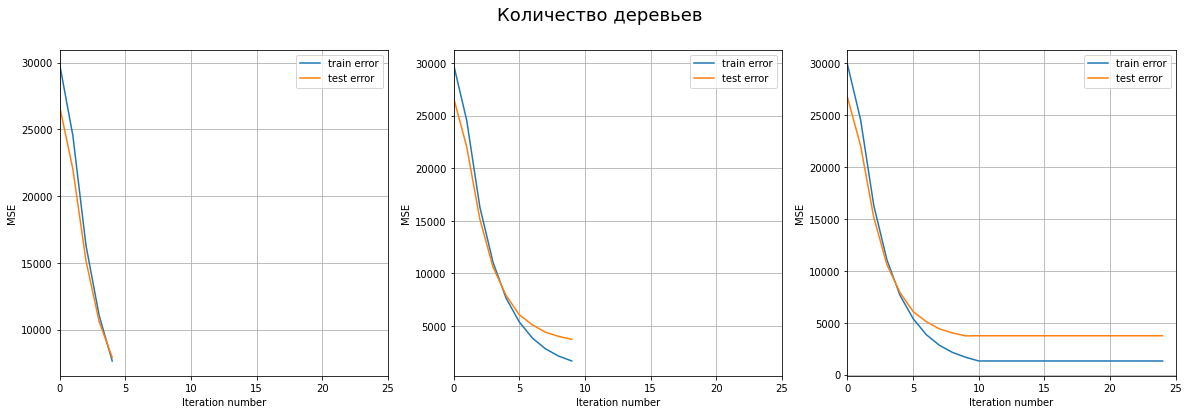

In [381]:
get_error_plots(gb1, gb2, gb3, name='Количество деревьев')

**Вывод:** С увеличением количества деревьев точность модели, как на обучающей выборке, так и на тестовой растет до определенного момента.

In [368]:
# Изменяем глубину деревьев

tree_num_2 = 25
tree_depth_2 = [3, 5, 10]
eta = 0.1

gb4 = gb_fit(tree_num_2, tree_depth_2[0], X_train, X_test, y_train, y_test, coefs, eta)
gb5 = gb_fit(tree_num_2, tree_depth_2[1], X_train, X_test, y_train, y_test, coefs, eta)
gb6 = gb_fit(tree_num_2, tree_depth_2[2], X_train, X_test, y_train, y_test, coefs, eta)

Ошибка на X_train модели 1: 2518.99
Ошибка на X_train модели 2: 1320.21
Ошибка на X_train модели 3: 461.90

***********************************

Ошибка на X_test модели 1: 3255.71
Ошибка на X_test модели 2: 3736.81
Ошибка на X_test модели 3: 4443.74


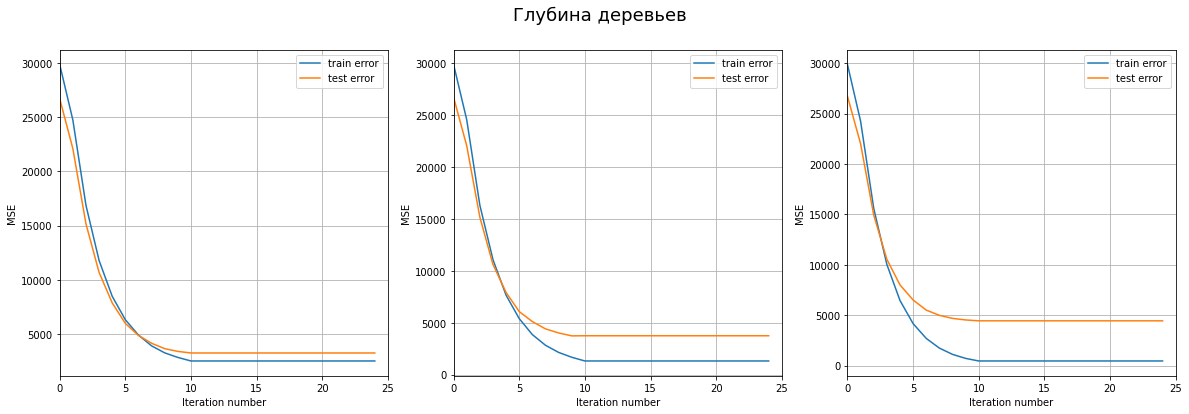

In [369]:
get_error_plots(gb4, gb5, gb6, name='Глубина деревьев')

**Вывод:** Глубина дерева сильно влияет на точность модели. Чем больше глубина деревьев, тем сильнее алгоритм переобучается. Это заметно по большой разнице в ошибке между выборками train (**461.90**) и test (**4443.74**).

In [370]:
params = [[5, 10, 25],
          [3, 5, 10]]

In [371]:
# Функция для поиска лучших параметров для модели градиентного спуска

def search_params(params, X_train, X_test, y_train, y_test, coefs, eta):

    min_err = np.inf

    for i in range(len(params[0])):
        for j in range(len(params[1])):
            temp = [params[0][i], params[1][j], gb_fit(params[0][i], params[1][j], X_train, X_test, y_train, y_test, coefs,eta)]
            min_test_err = min(temp[2][2])
            if min_test_err < min_err:
                min_err = min_test_err
                tree_num, tree_depth = params[0][i], params[1][j]
    
    print(f'Количество деревьев: {tree_num}\nГлубина деревьев: {tree_depth}\nМинимальная ошибка на X_test: {min_err}')
    
    return

In [372]:
# Лучшие параметры

search_params(params, X_train, X_test, y_train, y_test, coefs, eta)

Количество деревьев: 25
Глубина деревьев: 3
Минимальная ошибка на X_test: 3255.710527179324


**2. (\*) Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5.    Сравнить на одном графике кривые  изменения ошибки на тестовой выборке в зависимости от  числа итераций.**

In [385]:
def gb_fit_stoh(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, size=0.5):

    np.random.seed(42)
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
       
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # Новая подвыборка
        X_train_new = []
        y_train_new = []

        # Генерируем подвыборку из случайных индексов генеральной выборки
        for i in range(round(X_train.shape[0]*size)):
            X_train_new.append(list(X_train[np.random.randint(X_train.shape[0])]))
            y_train_new.append(y_train[np.random.randint(y_train.shape[0])]) 

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_new, y_train_new)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # получим ответы на текущей композиции
            z_train = gb_predict(X_train_new, trees, coefs, eta)            
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_new, bias(y_train_new, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [386]:
# Изменяем количество деревьев

tree_num_3 = [2, 6, 15]
tree_depth_3 = 3
eta = 0.5

gb7 = gb_fit_stoh(tree_num_3[0], tree_depth_3, X_train, X_test, y_train, y_test, coefs, eta)
gb8 = gb_fit_stoh(tree_num_3[1], tree_depth_3, X_train, X_test, y_train, y_test, coefs, eta)
gb9 = gb_fit_stoh(tree_num_3[2], tree_depth_3, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка на X_train модели 1: 12298.12
Ошибка на X_train модели 2: 7928.78
Ошибка на X_train модели 3: 7928.78

***********************************

Ошибка на X_test модели 1: 10820.68
Ошибка на X_test модели 2: 6805.67
Ошибка на X_test модели 3: 6805.67


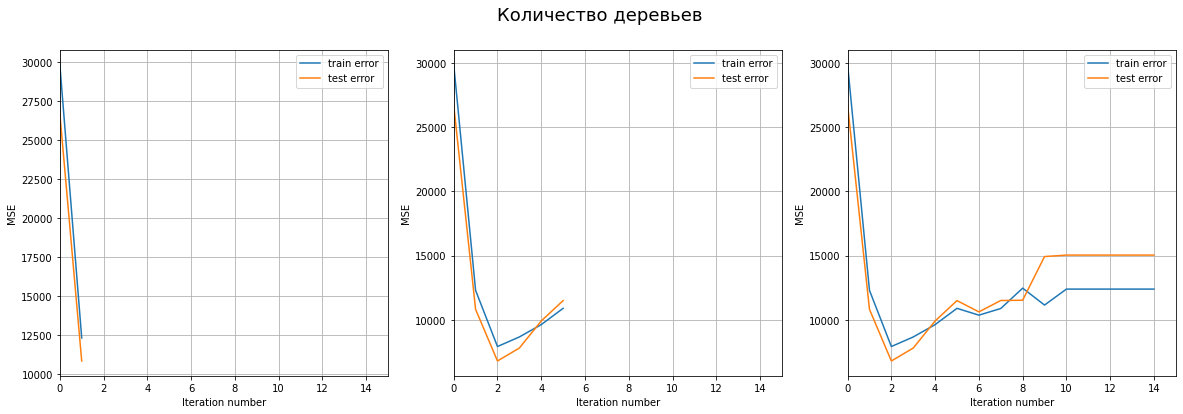

In [387]:
get_error_plots(gb7, gb8, gb9, name='Количество деревьев')

**Вывод:** Стохастический градиентный бустинг позволяет достичь минимальной ошибки на тестовой выборке за меньшее количество итераций, чем алгоритм обычного градиентного бустинга. В данном случае минимальная ошибка равна **6805.67**, что вдвое больше, чем при использовании обычного градиентного бустинга.

In [376]:
# Функция для поиска лучших параметров для модели стохастический градиентного спуска

def search_params_stoh(params, X_train, X_test, y_train, y_test, coefs):

    min_err = np.inf

    for i in range(len(params[0])):
        for j in range(len(params[1])):
            for k in range(len(params[2])):
                temp = [params[0][i], params[1][j], params[2][k], gb_fit_stoh(params[0][i], params[1][j], X_train, X_test, y_train, y_test, coefs, params[2][k])]
                min_test_err = min(temp[3][2])
                if min_test_err < min_err:
                    min_err = min_test_err
                    tree_num, tree_depth, eta = params[0][i], params[1][j], params[1][k]
    
    print(f'Количество деревьев: {tree_num}\nГлубина деревьев: {tree_depth}\nМинимальная ошибка на X_test: {min_err}\nШаг: {eta}')
    
    return

In [377]:
params = [[2, 5, 10, 25],
          [3, 5, 10],
          [0.05, 0.1, 0.5, 5]]

# Лучшие параметры

search_params_stoh(params, X_train, X_test, y_train, y_test, coefs)

Количество деревьев: 25
Глубина деревьев: 3
Минимальная ошибка на X_test: 6056.850403090216
Шаг: 5



**3. (\*) Модифицировать алгоритм градиентного бустинга, взяв за основу реализацию решающего дерева из ДЗ_4 (для задачи регрессии). Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.**